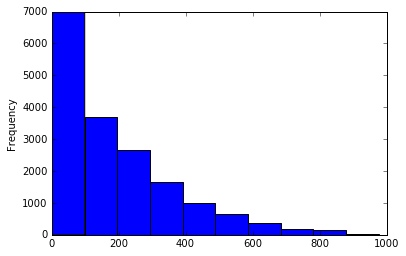

In [3]:
import pandas  as pd
bike_rentals = pd.read_csv('bike_rental_hour.csv')
%matplotlib inline
bike_rentals['cnt'].plot.hist()


In [7]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [53]:
def assign_label(num):
    if 6<=num<12:
        return 1
    if 12<=num<18:
        return 2
    if 18<=num<24:
        return 3
    if 0<=num<6:
        return 4
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bike_rentals, test_size=0.2)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 1591 to 8100
Data columns (total 18 columns):
instant       13903 non-null int64
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
casual        13903 non-null int64
registered    13903 non-null int64
cnt           13903 non-null int64
time_label    13903 non-null int64
dtypes: float64(4), int64(13), object(1)
memory usage: 2.0+ MB


In [56]:
train_X = train.drop(['cnt','casual','dteday','registered'],axis = 1)
train_Y = train['cnt']

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
test_X = test.drop(['cnt','casual','dteday','registered'],axis = 1)
test_Y = test['cnt']

In [59]:
predictions = lr.predict(test_X)

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions,test_Y)

17292.092811938277

In [61]:
from sklearn.tree import DecisionTreeRegressor
drt = DecisionTreeRegressor(min_samples_leaf = 1)
drt.fit(train_X,train_Y)
preditcions  = drt.predict(test_X)
mean_squared_error(predictions, test_Y)


17292.092811938277

In [65]:
from sklearn.ensemble import RandomForestRegressor
drt = RandomForestRegressor(min_samples_leaf=5)
drt.fit(train_X,train_Y)
preditcions  = drt.predict(test_X)
mean_squared_error(predictions, test_Y)

17292.092811938277